# Comparisons, Masks, and Boolean Logic

In [2]:
import numpy as np
import pandas as pd

In [4]:
# ! wget https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv
# ! mv Seattle2014.csv data/Seattle2014.csv

--2018-09-16 12:56:07--  https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv
Resolving webproxy (webproxy)... 10.36.62.1
Connecting to webproxy (webproxy)|10.36.62.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 45122 (44K) [text/plain]
Saving to: ‘Seattle2014.csv.1’

Seattle2014.csv.1   100%[===================>]  44.06K  --.-KB/s    in 0.02s   

2018-09-16 12:56:07 (2.32 MB/s) - ‘Seattle2014.csv.1’ saved [45122/45122]



In [6]:
rainfall_all = pd.read_csv('data/Seattle2014.csv')
rainfall_all.head(2)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999


In [11]:
rainfall = rainfall_all['PRCP'].values
rainfall[:5]

array([ 0, 41, 15,  0,  0])

In [12]:
type(rainfall)

numpy.ndarray

In [14]:
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

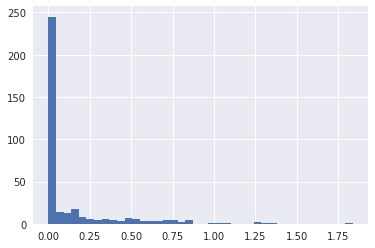

In [18]:
plt.hist(inches, bins=40);

## Comparisons
comparisons will yield Boolean arrays

### Scalar

In [27]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [28]:
x < 3

array([ True,  True, False, False, False])

In [29]:
x > 3

array([False, False, False,  True,  True])

In [30]:
x >= 3

array([False, False,  True,  True,  True])

In [31]:
x <= 3

array([ True,  True,  True, False, False])

In [32]:
x != 3

array([ True,  True, False,  True,  True])

In [33]:
x == 3

array([False, False,  True, False, False])

### Element-wise

In [35]:
2 * x == x ** 2

array([False,  True, False, False, False])

### N-D

In [36]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [38]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Boolean Arrays

### Counts

In [43]:
np.count_nonzero(x < 6)

8

In [44]:
sum (x < 6)

array([2, 2, 2, 2])

In [45]:
np.sum(x < 6)

8

In [47]:
np.sum(x < 6, axis=0)

array([2, 2, 2, 2])

In [48]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [52]:
np.any(x < 0)

False

In [53]:
np.all(x < 10)

True

In [59]:
np.all(x == 6)

False

In [62]:
np.all(x < 8, axis=1) # collapse columns

array([ True, False,  True])

### Bitwise Operators
`& | ^ ~`

In [68]:
np.sum((inches > 0.5) & (inches < 1)) # note the parentheses

29

In [71]:
np.sum(~( (inches <= 0.5) | (inches >= 1)))

29

In [76]:
np.sum(~(~(inches > 0.5) | ~(inches < 1)))

29

In [80]:
print("Number of days without rain:    ", np.sum(inches == 0))
print("Number of days with rain:       ", np.sum(inches > 0))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:   ", np.sum((inches > 0) & (inches < 0.2)))

Number of days without rain:     215
Number of days with rain:        150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches:    75


### Masks